computer vision libraries in pytorch

1.torchvision-base domain library for pytorch computer vision

2.torchvision.datsets - get daatsets and data loading functions for computer vision.

3.torchvision.models- get pretrained computer vision model that you can levarage for your own problems.

4.torchvision.transforms- functions for manipulating vision data(images) to be suitable for use with an ML model(images data -> tensors)

5.torch.utils.data.Dataset- base daatset class for pytorch

6.torch.utils.data.Dataloader- creates a python iterable over a dataset

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

**getting dataset**

The dataset will be using is FashionMNIST

In [2]:
#setup training data and testing data

#from torchvision import datasets
#from torchvision.transforms import ToTensor

train_data=datasets.FashionMNIST(
    root="data",   #where to download data to?
    train=True,    #do we want training dataset?
    download=True,  #do we want to download yes/no
    transform= ToTensor(),  #how do we want to trandform the data?
    target_transform=None   #how do we want to transform the label/targets?
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
#see the first training example
#pytorch in form C X H X W (c=no of color channels,h=height , w=width)
image,label=train_data[5]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0863, 0.3451, 0.7373, 0.6745, 0.5176, 0.4902, 0.5529,
           0.7804, 0.5608, 0.0353, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0784, 0.5137,
           0.7804, 0.8078, 0.7686, 0.7922, 0.9490, 1.0000, 1.0000, 0.9804,
           0.8706, 0.7725, 0.8078, 0.7373, 0.4941, 0.0667, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.1373, 0.8392, 0.7490,
           0.7176, 0.6980, 0.6863, 0.6588, 0.5882, 0.6353, 0.6235, 0.5961,
           0.6196, 0.7020, 0.7176, 0.7412, 0.7647, 0.7255, 0.3216, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6667, 0.7451, 0.6745,
           0.6941, 0.6902, 0.6706, 0.6627, 0.6353, 0.6078, 0.5804, 0.6039,
           0.6627, 0.6824, 0.6863, 0.6863, 

In [5]:
#different labels
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
#targets with thier values
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
#check the shape of our image, we are checking on X_train[5]
#there is only 1 colour channel in this image dataset since it is a greyscale image
print(image.shape)
print(label)
print(f"image label:{class_names[label]}")

torch.Size([1, 28, 28])
2
image label:Pullover


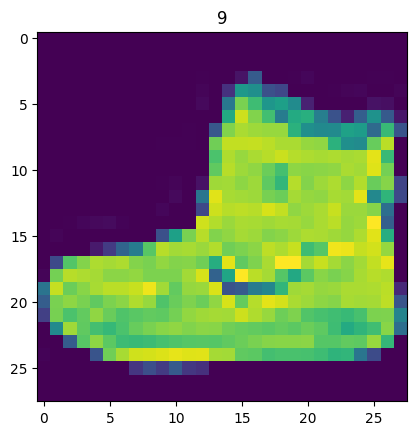

In [9]:
#visualizing our data
#matplot lib does not expect colour channels for grey scale images or colour channel last unlike pytorch which follows colour channel first
image,label=train_data[0]
plt.imshow(image.squeeze())   #removin the dimension
plt.title(label)
plt.show()

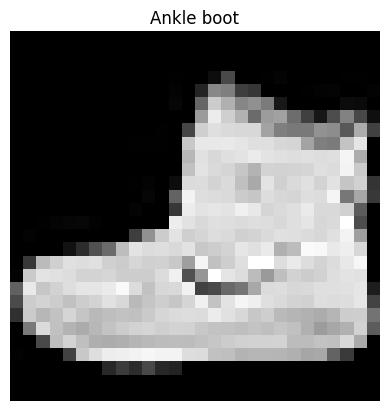

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()


 torch.randint(0, len(train_data), size=[1]) generates a 1-element tensor containing a random integer between 0 and len(train_data)-1,'size=[1]' means we want a tensor of shape [1] (i.e., one random value).

 Since this returns a tensor like tensor([7]), we use .item() to extract
 the number as a plain Python integer — which can then be used for indexing.


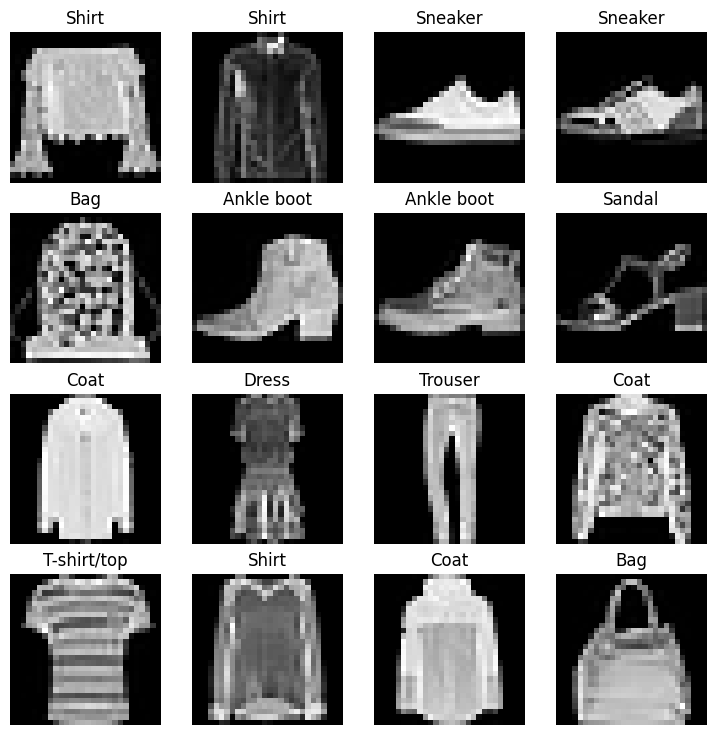

In [11]:

fig=plt.figure(figsize=(9,9))
rows,cols =4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.axis(False)
  plt.title(class_names[label])

plt.show()

these items of clothing will be modeled with both linear and non-linearity

**Prepare DataLoader**

right now,our data is in form of PyTorch Datasets.

we need to convert dataset into dataloader which is a python iterable.

more specifically, we have to turn our data into batches(or mini batches).

why would we do this?

1.more computatinally efficient, as computer hardware may not be able to look(store in memory) at 60000 images at a hit.so we break it down to 32 images at a time(batch size of 32).

2.it gives our neural network more chances to update its gradients per epoch.(mini-batch gradient descent)









In [12]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameters
BATCH_SIZE=32

#turn datasets into iterables(mini batches)

#training data needs to be shuffled so that or model does not learn order
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

#we do not need to shuffle the test data as model never see test data during training and ordered test pair is easier for evaluation
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f813947f390>,
 <torch.utils.data.dataloader.DataLoader at 0x7f813947d550>)

In [14]:
#let's check out what we have created

print(f"DataLoaders:{train_dataloader,test_dataloader}")
print(len(train_dataloader))   #no of batches
print(len(test_dataloader))

DataLoaders:(<torch.utils.data.dataloader.DataLoader object at 0x7f813947f390>, <torch.utils.data.dataloader.DataLoader object at 0x7f813947d550>)
1875
313


In [15]:
#what is inside the training dataloader?
#input shape=(batch_size,colour channels,height,width)
train_features_batch,train_labels_batch=next(iter(train_dataloader))    #1
train_features_batch.shape,train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

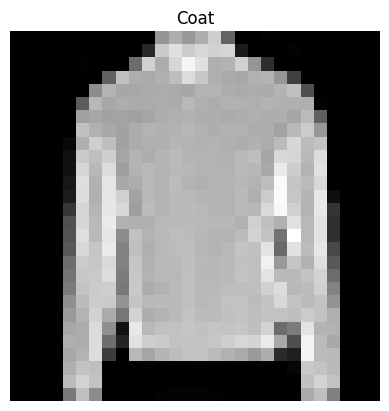

torch.Size([1, 28, 28])
tensor(4)


In [16]:
#how to visulaize a batch
#torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()
print(img.shape)
print(label)


Building a baseline model (best practice)

A baseline model is a simple model you will try and improve upon with subsquent models/experiments.

In [17]:
#create a flatten layer
flatten_model=nn.Flatten()

#get a single smaple
x=train_features_batch[0]
x.shape

#flatten the sample
output=flatten_model(x)    #perform forward pass

print(f"shape before falttening:,{x.shape}")
print(f"shape after flattening:{output.shape}")   #colour channels, heigh*width

shape before falttening:,torch.Size([1, 28, 28])
shape after flattening:torch.Size([1, 784])


nn.Flatten()

Purpose: Converts multi-dimensional input (like images) into a 1D vector per sample — required before feeding into nn.Linear.

linear layer cannot handle multi dimnesional data.

In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape :int,
               hidden_units :int,
               output_shape:int
               ):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),    #this layer has no learnable parameters
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)

    )


  def forward(self,x):     #here x is a batch of images at a time
      return self.layer_stack(x)






Although nn.Flatten() is used in the model to convert each image from shape [1, 28, 28] to a 1D tensor of 784 values, we still need to explicitly pass input_shape=784 to the first nn.Linear layer because it requires knowing the number of input features it will receive after flattening.

The flattening operation prepares the data, but the linear layer needs to be told in advance how many features to expect — that's why we specify 784 as the input shape even though the model handles the flattening internally.

In [19]:
torch.manual_seed(42)

#setup model with input parameters
model_0=FashionMNISTModelV0(
    input_shape=784 ,  #output of faltten is input shape
    hidden_units=10  ,  #how many units in hidden layer
    output_shape=len(class_names)
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

The line dummy_x = torch.rand([1, 1, 28, 28]) creates a batch of one grayscale image of size 28×28, where the first 1 represents the batch size. Even for testing with a single image, PyTorch models expect the input in batch format. In actual training, the batch size is commonly 32, so the input shape becomes [32, 1, 28, 28], meaning 32 images per batch, each with 1 channel and 28×28 pixels. PyTorch models are built to handle batches rather than single samples because batch processing is much faster and more efficient on both CPUs and GPUs. That’s why even one image is wrapped inside a batch dimension.

During a forward pass, the input batch goes through a series of layers — it first gets flattened from [1, 1, 28, 28] to [1, 784], then passes through the first linear layer (784 → hidden_units) and then through a second linear layer (hidden_units → 10). The final output is a set of raw class scores called logits. For a batch size of 1, the output shape is [1, 10], which means one row (one image) and 10 columns (one score per class). So yes, [1, 10] means 1 row and 10 columns — one complete prediction for the image. If the batch size was 32, the output would be [32, 10], giving 10 class scores for each of the 32 images in the batch.

In [20]:
dummy_x=torch.rand([1,1,28,28])
print(model_0(dummy_x) )     #shape [1,10], one logits per class
model_0(dummy_x).shape

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)


torch.Size([1, 10])

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [22]:
import requests
from pathlib import Path

#download healper function from learn pytorch repo
if Path("helper_function.py").is_file():
  print("already exist,skipping download....")
else:
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)
  print("downloading.....")

already exist,skipping download....


In [23]:
#set up a loss function, optimizer,accuracy metrices
from helper_function import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)


**Creating a function to time out experiments**

machine learning is very experimental

two of the main things you will often want to track are:

1.model's performance (loss and accuracy value)

2.how fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end:float,
                     device:torch.device=None):
  total_time=end-start
  print(f"train time on {device}: {total_time:.3f} seconds")
  return total_time


In [25]:
start_time= timer()
print("just for demonstrating")
end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")

just for demonstrating
train time on cpu: 0.000 seconds


0.0002987760000223716

**creating a training loop and training a model on batches of data**

note: the optimizer will update a model's parameter once per batch rather than once per epoch

steps:

1.loop through epochs

2.loop through training batches,perform training steps, calculate the **train  loss per batch**

3.loop through testing batches,perform testing step,calculate **test loss per** **batch**

In [26]:
#Import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)
start_training_time_cpu=timer()

#we will keep this small intially for faster training time
epochs=3

for epoch in tqdm(range(epochs)):
    print(f"epoch: {epoch}\n----")

    train_loss=0
    #Add a loop to loop through all the training batches

    for batch, (X,y) in enumerate(train_dataloader):
      model_0.train()

      y_pred=model_0(X)   #forward pass

      loss=loss_fn(y_pred,y)
      train_loss+=loss   #accumulate train loss

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch%400==0:
        print(f"looked at {batch *len(X)}/ {len(train_dataloader.dataset)} samples")

    #divide total train loss by length of train dataloader
    train_loss=train_loss/len(train_dataloader)

    #testing
    test_loss,test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
          test_pred=model_0(X_test)
          test_loss+=loss_fn(test_pred,y_test)

          test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))   #logits ->labels usig argmax

        #calculate test_loss,test accuracy average per batch
        test_loss=test_loss/ len(test_dataloader)
        test_acc=test_acc  /  len(test_dataloader)

    #print out
    print(f"\nTrain loss:{train_loss:.4f} | Test loss: {test_loss:4f} | Test accuracy:{test_acc:.4f}")

end_training_time_cpu = timer()
total_train_time_model_0=print_train_time(start=start_training_time_cpu,
                                          end=end_training_time_cpu,
                                          device=str(next(model_0.parameters()).device) )


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
----
looked at 0/ 60000 samples
looked at 12800/ 60000 samples
looked at 25600/ 60000 samples
looked at 38400/ 60000 samples
looked at 51200/ 60000 samples

Train loss:0.5904 | Test loss: 0.509535 | Test accuracy:82.0387
epoch: 1
----
looked at 0/ 60000 samples
looked at 12800/ 60000 samples
looked at 25600/ 60000 samples
looked at 38400/ 60000 samples
looked at 51200/ 60000 samples

Train loss:0.4763 | Test loss: 0.479890 | Test accuracy:83.1969
epoch: 2
----
looked at 0/ 60000 samples
looked at 12800/ 60000 samples
looked at 25600/ 60000 samples
looked at 38400/ 60000 samples
looked at 51200/ 60000 samples

Train loss:0.4550 | Test loss: 0.476639 | Test accuracy:83.4265
train time on cpu: 26.159 seconds


In [27]:
#make prediction and get Model_0 results

device ="cuda" if torch.cuda.is_available() else "cpu"
#returns a dictionary containing the result of model predicting on data_loader
def eval_model(model :torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):

    loss,acc=0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
          X,y=X.to(device),y.to(device)
          y_pred=model(X)
          loss+=loss_fn(y_pred,y)
          acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        loss=loss/len(data_loader)    #loss and acc per batch
        acc=acc/len(data_loader)

    return {"model_name":model.__class__.__name__,   #only works when model was created with loss
            "model_loss":loss.item(),
            "model_acc":acc}

model_0_results=eval_model( model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                            device=device)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

setup device agnostic code

Building a better model with non  linearity

In [28]:
class FashionMNISTModelv1(nn.Module):
  def __init__(self,
               input_shape :int,
               hidden_units:int,
               output_shape:int):

    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)


In [29]:
torch.manual_seed(42)
model_1=FashionMNISTModelv1(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [30]:
#set up loss function and evaluation metrices
from helper_function import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

functionizing training and evaluating/testing loops

In [31]:
#function train_step() for training loop

def train_step(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):

      train_loss ,train_acc=0,0
      model.train()

      #Add a loop to loop through all the training batches
      for batch, (X,y) in enumerate(data_loader):

        #put data on taregt device
        X,y=X.to(device),y.to(device)

        y_pred=model(X)   #forward pass

        loss=loss_fn(y_pred,y)
        train_loss+=loss   #accumulate train loss
        train_acc+=accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      #divide total train loss and accuracy by length of train dataloader
      train_loss=train_loss/len(train_dataloader)
      train_acc=train_acc/len(train_dataloader)

      print(f"Train loss:{train_loss:.5f} | Train accuracy:{train_acc:2f}%")






In [32]:
def test_step(model: torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device =device):

  test_loss,test_acc=0,0

  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)

      test_pred=model(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,
                            y_pred=test_pred.argmax(dim=1))


    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test acc:{test_acc:.2f} % \n")


training and testing loop

In [33]:
torch.manual_seed(42)
from timeit import default_timer as timer
start_time_gpu=timer()

#set epochs
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch} \n----")

  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time_gpu=timer()
total_train_time_model_1=print_train_time(start=start_time_gpu,
                                          end=end_time_gpu,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0 
----
Train loss:1.09199 | Train accuracy:61.343333%
Test loss: 0.95636 | Test acc:65.00 % 

epoch:1 
----
Train loss:0.78101 | Train accuracy:71.928333%
Test loss: 0.72227 | Test acc:73.91 % 

epoch:2 
----
Train loss:0.67027 | Train accuracy:75.936667%
Test loss: 0.68500 | Test acc:75.02 % 

train time on cuda: 28.518 seconds


In [34]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [35]:
model_1_results=eval_model( model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                            device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [36]:
model_1_results

{'model_name': 'FashionMNISTModelv1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

**model 1 couldn't beat model 0**

sometimes depending on your data or hardware you might find model trains faster on CPU than GPU

reason:

1.it could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU

2.The hardware you are using has a better cpu in terms  of compute capability than gpu(rare case)

model 2: Building a convolutional neural network(CNN)

CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data

**how filter works:**

An input matrix (image) and a kernel/filter matrix (usually square like 3x3) are used.

Imagine placing the filter on the top-left corner of the input image.

Perform element-wise multiplication between the overlapping values of the filter and the input, then sum the result — this becomes the first value in the output feature map.

With stride = 1, the filter moves one pixel to the right and the process repeats.

Once it reaches the end of a row, the filter moves one row down and starts again from the left — like reading a book.

Padding is added to the input image to ensure:

The filter fits even at the borders,

And the output size remains the same as the input (especially with padding=1 and kernel_size=3).

This process allows the model to scan the image for patterns (edges, textures, etc.), with each filter detecting different features.



**MaxPool2d Layer**:

MaxPool2d is a downsampling operation used in CNNs to reduce the spatial dimensions (height & width) of feature maps.

It works by sliding a small window (e.g., 2x2) over the input and selecting the maximum value from each region.

This operation does not learn any weights — it's a fixed mathematical function (non-trainable).

Typically used after Conv2d + ReLU to retain the most important features while reducing computation.

Helps the model become more robust to small translations/shifts in the input.

conv_layer1,conv_layer2=feature extraction layer

output layer=classifier layer

In [37]:
#create a convolutional neural network

class FashionMNISTModelv2(nn.Module):       #replicating the TinyVGG model
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape:int):

      super().__init__()
      self.conv_block_1=nn.Sequential(

          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),

          nn.ReLU(),

          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),

          nn.ReLU(),

          nn.MaxPool2d(kernel_size=2)
          )
      self.conv_block_2=nn.Sequential(

          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                   padding=1),

          nn.ReLU(),

          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),

          nn.ReLU(),

          nn.MaxPool2d(kernel_size=2)
      )

      self.classifier=nn.Sequential(

          nn.Flatten(),

          nn.Linear(in_features= hidden_units * 7 * 7 ,     #there is a trick to calculate this
                    out_features=output_shape)
      )


    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        #print(x.shape)

        return x




In [57]:
torch.manual_seed(42)
model_2=FashionMNISTModelv2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)     #no of color channel is 1 in greyscale

In [39]:
image.shape

torch.Size([1, 28, 28])

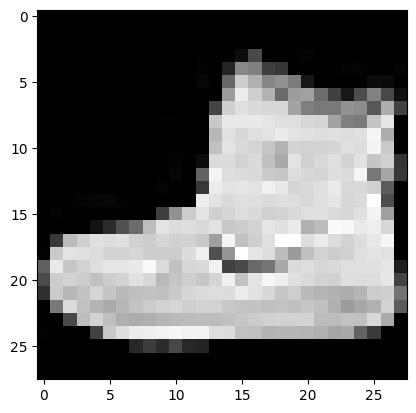

In [40]:
plt.imshow(image.squeeze(), cmap="gray")

In [41]:
#replicating the same image tensor shape to feed the forward function
rand_image_tensor=torch.randn(size=(1,1,28,28))
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [42]:
#pass image through model
model_2(rand_image_tensor.to(device))      #error in classifier as we have to figure out the in_channels for classifier layer, that's why the print statement after each layer

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

**stepping through nn.conv2d()**

In [43]:
torch.manual_seed(42)

#create a batch of images
images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(images.shape)
print(test_image.shape)
print(test_image)

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.

In [44]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

Higher stride = more skipping = smaller output size

More compression, but less detail

A smaller stride (usually 1) means the filter shifts by one pixel at a time, resulting in a larger output feature map that captures fine-grained details. This is useful when precise spatial features are important, but it also increases computational cost.

In contrast, a larger stride (like 2 or more) makes the filter jump more pixels per step, producing a smaller, more compressed output. This speeds up the model and reduces memory usage but may miss smaller features. Typically, stride 1 is used in most convolution layers for better feature extraction, while stride 2 is used intentionally for downsampling when pooling is not applied.



In [45]:
#create a single conv2d layer for above batch of iamge
torch.manual_seed(42)
conv_layer= nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1)

#pass the data though convolutional layer
conv_output=conv_layer(test_image)
conv_output

tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
         [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
         [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
         ...,
         [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
         [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
         [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

        [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
         [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
         [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
         ...,
         [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
         [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
         [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

        [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
         [-0.5791,  0.4414,  0.5100,  ...,  0

**stepping through nn.MaxPool2d()**

In [46]:
test_image.shape

torch.Size([3, 64, 64])

In [47]:
#create a sample nn.MaxPool2d layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass data through just thr cnv layer
test_image_conv=conv_layer(test_image)
print(test_image_conv.shape)

#pass data through max_pool_layer
test_image_conv_maxpool=max_pool_layer(test_image_conv)
print(test_image_conv_maxpool.shape)


torch.Size([10, 64, 64])
torch.Size([10, 32, 32])


note: the convulational layer learns the features and then we pass it thorough ReLU , in case our data reuires non-linearity, and then we pass this learned feature through MaxPool layer to compress them even further and choose the most important features

In [48]:
torch.manual_seed(42)

#create a 4d tensor with a similar number of dimensions to our images
random_tensor=torch.randn(size=(1,1,2,2))
print(random_tensor)
print(random_tensor.shape)

#create a  max pool layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass data through max_pool_layer
max_pool_tensor=max_pool_layer(random_tensor)
print(max_pool_tensor)
print(max_pool_tensor.shape)

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
torch.Size([1, 1, 2, 2])
tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


setup a loss function and an optimizer and evaluation metric for model_2

In [49]:
from helper_function import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

Training and testing our model_2

In [58]:
torch.manual_seed(42)
start_time_model_2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n-----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)


  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time_model_2=timer()
total_train_time_model_2=print_train_time(start=start_time_model_2,
                                          end=end_time_model_2,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
-----
Train loss:2.30229 | Train accuracy:10.000000%
Test loss: 2.30231 | Test acc:9.99 % 

epoch:1
-----
Train loss:2.30228 | Train accuracy:10.000000%
Test loss: 2.30231 | Test acc:9.99 % 

epoch:2
-----
Train loss:2.30228 | Train accuracy:10.000000%
Test loss: 2.30231 | Test acc:9.99 % 

train time on cuda: 35.472 seconds


In [52]:
model_2_results=eval_model( model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                            device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [59]:
print(model_0_results)
print(model_1_results)
print(model_2_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}
{'model_name': 'FashionMNISTModelv1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}
{'model_name': 'FashionMNISTModelv2', 'model_loss': 0.2914322018623352, 'model_acc': 89.83626198083067}


**compare model results and training time**

In [60]:
import pandas as pd
compare_result=pd.DataFrame({"model_0":model_0_results,
                             "model_1":model_1_results,
                             "model_2":model_2_results}) .T
compare_result

,model_name,model_loss,model_acc
model_0,FashionMNISTModelV0,0.476639,83.426518
model_1,FashionMNISTModelv1,0.685001,75.019968
model_2,FashionMNISTModelv2,0.291432,89.836262


In [61]:
#add training time to result comaparision
compare_result["training_time"]=[total_train_time_model_0,
                                 total_train_time_model_1 ,
                                 total_train_time_model_2]


compare_result


,model_name,model_loss,model_acc,training_time
model_0,FashionMNISTModelV0,0.476639,83.426518,26.158920
model_1,FashionMNISTModelv1,0.685001,75.019968,28.517942
model_2,FashionMNISTModelv2,0.291432,89.836262,35.472397


Text(0, 0.5, 'model')

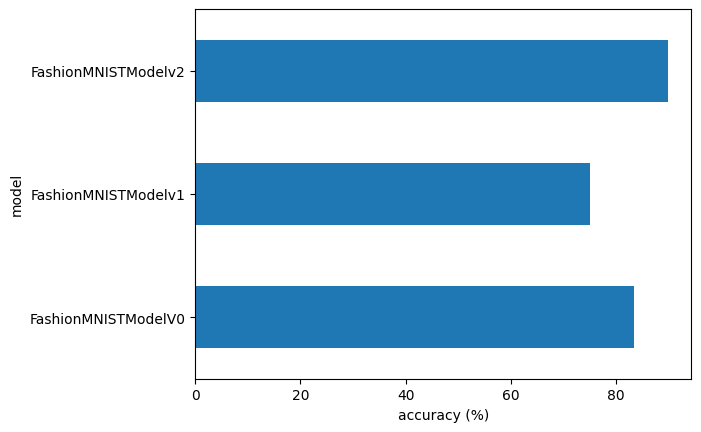

In [62]:
#visualize our model results
compare_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

Make and evaluate random prediction with best model

In [56]:
def make_prediction(model:torch.nn.Module,
                    data: list,
                    device:torch.device=device):

  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:

      #prepare the sample
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #forward pass(raw logits)
      pred_logits=model(sample)

      #prediction probability
      pred_prob=torch.softmax(pred_logits.squeeze(),dim=0)

      #get pred_prob off the gpu
      pred_probs.append(pred_prob.cpu())

  #stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)




In [57]:
import random
#random.seed(42)

test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)


In [58]:
#Make prediction
pred_probs=make_prediction(model=model_2,
                           data=test_samples)

#view first two prediction probability
pred_probs[:2]

tensor([[4.6593e-07, 6.7730e-07, 1.9424e-06, 6.4892e-06, 5.6734e-07, 3.2890e-04,
         8.7186e-08, 9.9953e-01, 5.5909e-05, 7.0546e-05],
        [2.7496e-06, 1.1466e-06, 1.5073e-06, 2.6015e-06, 6.1246e-06, 1.8971e-03,
         1.1756e-05, 9.6895e-03, 6.5271e-04, 9.8773e-01]])

In [59]:
test_labels

[7, 9, 6, 1, 3, 9, 2, 0, 0]

In [60]:
#convert the prediction probabilities to labels

pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([7, 9, 0, 1, 3, 9, 2, 0, 0])

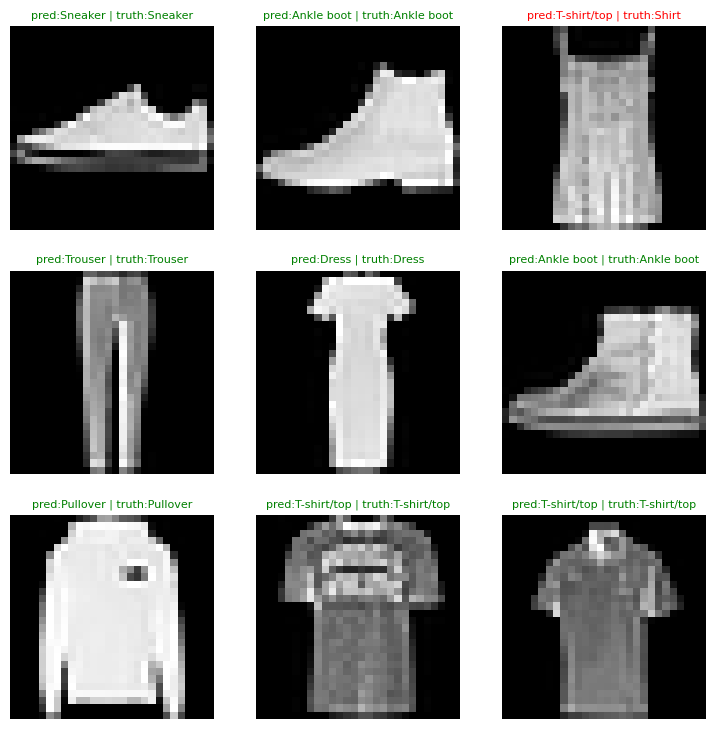

In [61]:
#plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.axis("off")

  #plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  #find the prediction(in text form)
  pred_label=class_names[pred_classes[i]]


  #set the truth label in text form
  truth_label=class_names[test_labels[i]]

  #create a title for the plot
  title_text=(f"pred:{pred_label} | truth:{truth_label}")

  #check for quality pred and truth and change colour accordingly
  if pred_label==truth_label:
    plt.title(title_text,fontsize=8,c="g")
  else:
    plt.title(title_text,fontsize=8,c="r")



**confusion matrix for further prediction evaluation**

In [62]:
#make prediction with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="making prediction..."):
    X,y=X.to(device),y.to(device)

    #forward pass
    y_logits=model_2(X)

    #logits to labels
    y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

    #put prediction on cpu for evaluation
    y_preds.append(y_pred.cpu())

#concatenate list of prediction into a tensor
y_pred_tensor =torch.cat(y_preds)
y_pred_tensor

making prediction...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

In [63]:
try:
  import torchmetrics , mlxtend
  print(f"torchmetrics version:{torchmetrics.__version__}")
  print(f"mlxtend version:{mlxtend.__version__}")
except:
  !pip install torchmetrics -U mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [64]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [65]:
#setup confusion matrix instance and compare predictions to targets

confmat=ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tesnor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)
confmat_tesnor

tensor([[604,   5,  46,  67,   9,   1, 261,   0,   7,   0],
        [ 11, 896,   7,  62,  17,   0,   3,   0,   3,   1],
        [  8,   3, 821,  12,  89,   0,  61,   0,   6,   0],
        [ 23,  11,  25, 850,  45,   0,  38,   0,   6,   2],
        [  2,   6, 135,  47, 726,   0,  77,   0,   7,   0],
        [  4,   1,   4,   4,   1, 825,   2,  73,  62,  24],
        [ 65,   5, 134,  57,  94,   0, 632,   0,  13,   0],
        [  1,   1,   0,   0,   0,  23,   0, 912,  11,  52],
        [  6,   2,  27,  14,  13,   6,  22,   7, 902,   1],
        [  0,   0,   1,   2,   0,  23,   2,  93,   7, 872]])

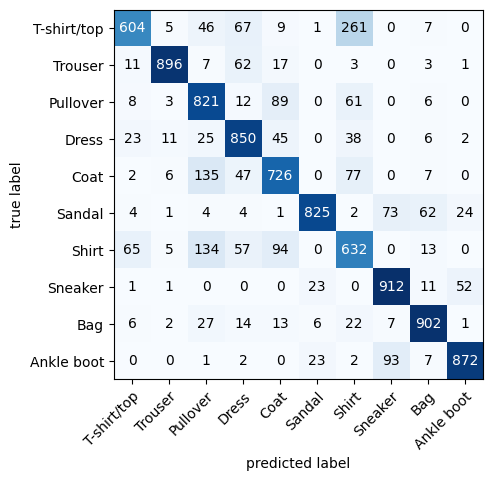

In [66]:
#plot our confusion matrix
fig,axis=plot_confusion_matrix(conf_mat=confmat_tesnor.numpy(),
                               class_names=class_names)
plt.show()

In [67]:
#save and load best performance model
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME="03_pytorch_cv_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

In [68]:
#create new instance of model 2 and load it in
torch.manual_seed(42)
loaded_model_2=FashionMNISTModelv2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelv2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [69]:
model_2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.33145028352737427,
 'model_acc': 87.92931309904154}

In [70]:
torch.manual_seed(42)
loaded_model_2_results=eval_model( model=loaded_model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                            device=device)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.33145028352737427,
 'model_acc': 87.92931309904154}

In [71]:
#check if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)